In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.stem.porter import PorterStemmer
nltk. download ('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from wordcloud import WordCloud
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import pickle
import re

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [95]:
#Load the data
data = pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/Sentiment Analysis/amazon_alexa.tsv", delimiter = '\t', quoting = 3)
print(f"Dataset shape : {data.shape}")

Dataset shape : (3150, 5)


In [96]:
data.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [97]:
#Column names
print(f"Feature names : {data.columns.values}")

Feature names : ['rating' 'date' 'variation' 'verified_reviews' 'feedback']


In [98]:
#Check for null values
data.isnull().sum()

,0
rating,0
date,0
variation,0
verified_reviews,1
feedback,0


In [99]:
#Getting the record where 'verified reviews' is null
data[data[ 'verified_reviews']. isna () == True]

,rating,date,variation,verified_reviews,feedback
473,2,29-Jun-18,White,NaN,0


In [100]:
#We will drop the null record
data.dropna(inplace=True)

In [101]:
print(f"Dataset shape after dropping null values : {data.shape}")

Dataset shape after dropping null values : (3149, 5)


In [102]:
#Creating a new column 'length' that will contain the length of the string in 'verified reviews' column
data[ 'length'] = data[ 'verified_reviews'].apply(len)

In [103]:
data.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1,197
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1,174
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


In [104]:
#Randomly checking for 10th record
print(f" 'verified _reviews' column value: {data. iloc[10]['verified_reviews']}") #Original value
print(f"Length of review : {len(data.iloc[10]['verified_reviews'])}") #Length of review using Len()
print(f"'length' column value : {data.iloc[10]['length']}") #Value of the column 'Length'

 'verified _reviews' column value: "I sent it to my 85 year old Dad, and he talks to it constantly."
Length of review : 65
'length' column value : 65


In [105]:
data.dtypes

,0
rating,int64
date,object
variation,object
verified_reviews,object
feedback,int64
length,int64


In [106]:
len(data)

3149

In [107]:
# analyzing "rating" coloumn
#Distinct values of 'rating' and its count
print(f"Rating value count: \n{data[ 'rating']. value_counts()}")

Rating value count: 
rating
5    2286
4     455
1     161
3     152
2      95
Name: count, dtype: int64


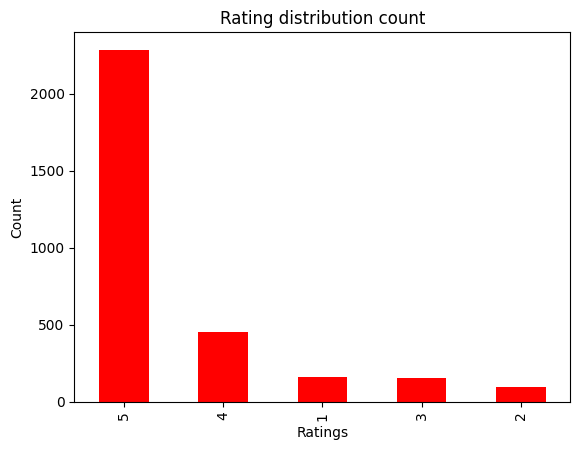

In [108]:
#Bar plot to visualize the total counts of each rating
data['rating']. value_counts().plot. bar (color = 'red')
plt.title( 'Rating distribution count')
plt. xlabel ('Ratings')
plt. ylabel ('Count')
plt. show()

In [109]:
#Finding the percentage distribution of each rating - we'll divide the number of records for each rating by total number of recor
print(f"Rating value count - percentage distribution: \n {round(data[ 'rating']. value_counts()/data.shape[0]*100,2)}")

Rating value count - percentage distribution: 
 rating
5    72.59
4    14.45
1     5.11
3     4.83
2     3.02
Name: count, dtype: float64


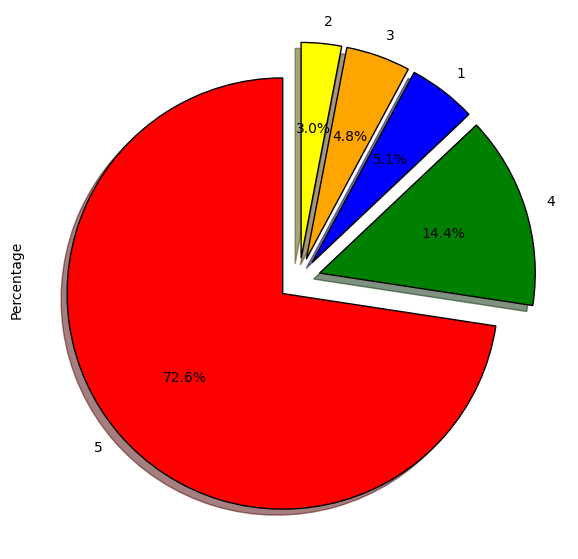

In [110]:
fig = plt.figure(figsize=(7,7))
colors = ('red', 'green', 'blue', 'orange', 'yellow')
wp = {'linewidth':1, "edgecolor": 'black'}
tags = data[ 'rating']. value_counts()/data. shape[0]
explode=(0.1,0.1,0.1,0.1,0.1)
tags.plot(kind='pie', autopct="%1.1f%%", shadow=True, colors=colors, startangle=90, wedgeprops=wp, explode=explode, label='Percentage')
from io import BytesIO
graph = BytesIO()
fig.savefig(graph, format="png")

In [111]:
# analyzing the "feedback" coloumn

In [112]:
#Distinct values of 'feedback' and its count
print(f"Feedback value count: \n{data[ 'feedback'].value_counts()}")

Feedback value count: 
feedback
1    2893
0     256
Name: count, dtype: int64


In [113]:
#There are 2 distinct values of 'feedback' present - 0 and 1. Let's see what kind of review each value corresponds to
#feedback value = 0

In [114]:
#Extracting the 'verified_reviews' value for one record with feedback = 0
review_0 = data[data[ 'feedback'] == 0]. iloc[1]['verified_reviews']
print(review_0)

Sound is terrible if u want good music too get a bose


In [115]:
#Extracting the 'verified_reviews' value for one record with feedback = 1
review_1 = data[data[ 'feedback'] == 1]. iloc[1][ 'verified_reviews']
print(review_1)

Loved it!


In [116]:
# From the above 2 examples we can see that feedback 0 is negative review and 1 is positive review
# Let's plot the feedback value count in a bar graph

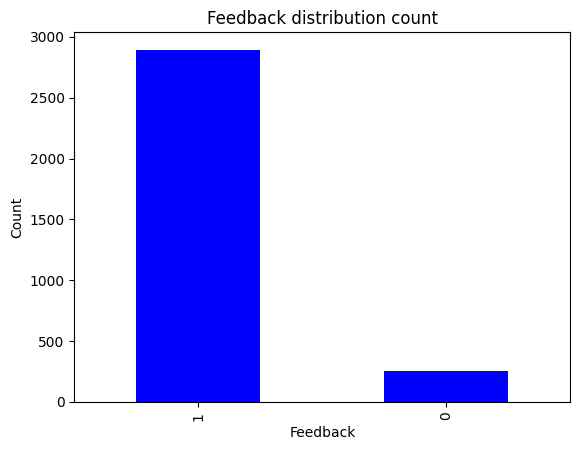

In [117]:
#Bar graph to visualize the total counts of each feedback
data[ 'feedback']. value_counts().plot.bar(color = 'blue')
plt. title( 'Feedback distribution count')
plt. xlabel ('Feedback')
plt. ylabel ( 'Count')
plt. show()

In [118]:
#Finding the percentage distribution of each feedback - we'll divide the number of records for each feedback by total number of record
print(f"Feedback value count - percentage distribution: In{round(data[ 'feedback']. value_counts ()/data.shape[0]*100,2)}")

Feedback value count - percentage distribution: Infeedback
1    91.87
0     8.13
Name: count, dtype: float64


In [119]:
# Feedback distribution
# 1. 91.87% reviews are positive
# 0.  8.13% reviews are negative

<Axes: ylabel='Presentage'>

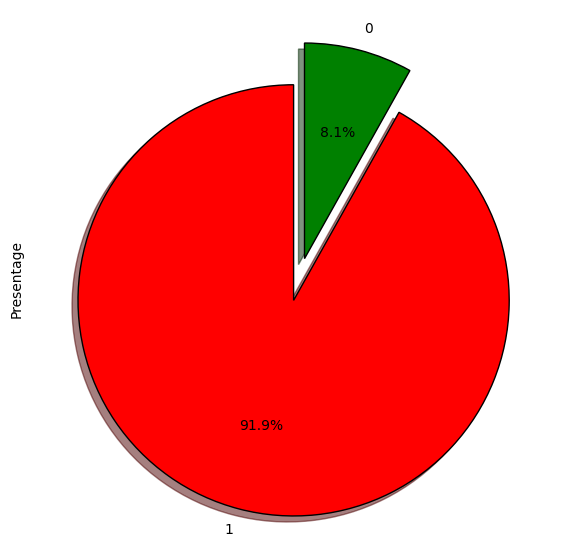

In [120]:
fig = plt.figure(figsize=(7,7))
colors = ('red', 'green')
wp = {'linewidth' :1, "edgecolor": 'black'}
tags = data[ 'feedback']. value_counts ()/data.shape[0]
explode=(0.1,0.1)
tags.plot(kind='pie',
autopct="%1.1f%%", shadow=True, colors=colors, startangle=90, wedgeprops=wp, explode=explode, label='Presentage')

In [121]:
#Feedback = 0
data[data['feedback'] == 0]['rating'].value_counts()

,count
rating,
1,161
2,95


In [122]:
#Feedback = 1
data[data['feedback'] == 1][ 'rating'].value_counts()

,count
rating,
5,2286
4,455
3,152


In [123]:
# analying the 'variation' coloumn

In [124]:
#Distinct values of 'variation' and its count
print(f"Variation value count: In{data[ 'variation']. value_counts()}")

Variation value count: Invariation
Black  Dot                      516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black  Plus                     270
Black  Show                     265
Black                           261
Black  Spot                     241
White  Dot                      184
Heather Gray Fabric             157
White  Spot                     109
Sandstone Fabric                 90
White                            90
White  Show                      85
White  Plus                      78
Oak Finish                       14
Walnut Finish                     9
Name: count, dtype: int64


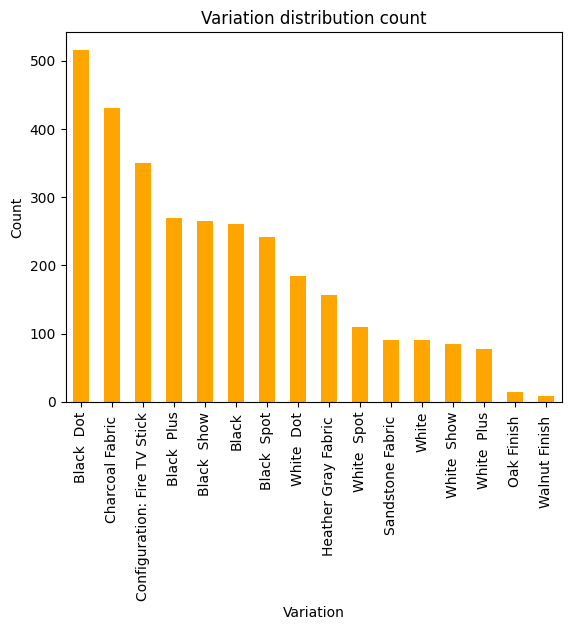

In [125]:
#Bar graph to visualize the total counts of each variation
data['variation']. value_counts().plot.bar(color = 'orange')
plt.title('Variation distribution count')
plt.xlabel('Variation')
plt.ylabel('Count')
plt.show()

In [126]:
#Finding the percentage distribution of each variation - we'll divide the number of records for each variation by total number of
print(f"Variation value count - percentage distribution: In{round(data['variation']. value_counts()/data.shape[0]*100,2)}")

Variation value count - percentage distribution: Invariation
Black  Dot                      16.39
Charcoal Fabric                 13.66
Configuration: Fire TV Stick    11.11
Black  Plus                      8.57
Black  Show                      8.42
Black                            8.29
Black  Spot                      7.65
White  Dot                       5.84
Heather Gray Fabric              4.99
White  Spot                      3.46
Sandstone Fabric                 2.86
White                            2.86
White  Show                      2.70
White  Plus                      2.48
Oak Finish                       0.44
Walnut Finish                    0.29
Name: count, dtype: float64


In [127]:
#Let's analyze the above ratings
data.groupby('variation')['rating'].mean()

,rating
variation,
Black,4.233716
Black Dot,4.453488
Black Plus,4.370370
Black Show,4.490566
Black Spot,4.311203
Charcoal Fabric,4.730233
Configuration: Fire TV Stick,4.591429
Heather Gray Fabric,4.694268
Oak Finish,4.857143


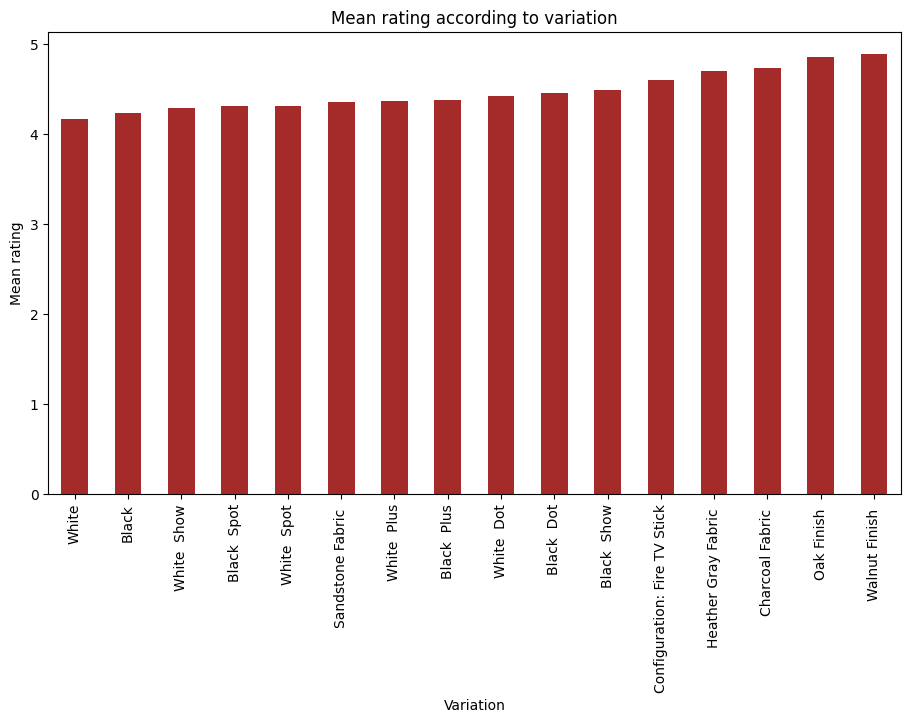

In [128]:
data.groupby('variation') ['rating'].mean().sort_values().plot.bar(color = 'brown', figsize=(11, 6))
plt.title("Mean rating according to variation")
plt.xlabel ('Variation')
plt.ylabel( 'Mean rating')
plt.show()

In [129]:
# Analyzing 'verified_reviews' column
data["length"].describe()

,length
count,3149.000000
mean,132.714513
std,182.541531
min,1.000000
25%,30.000000
50%,74.000000
75%,166.000000
max,2853.000000


[Text(0.5, 1.0, 'Distribution of length of review ')]

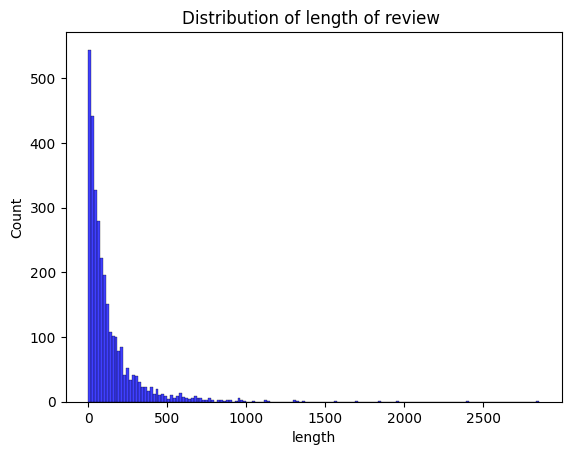

In [130]:
# Length analysis for full dataset
sns.histplot(data['length'],color='blue').set(title='Distribution of length of review ')

In [131]:
#Length analysis when feedback is Ô (negative)

[Text(0.5, 1.0, 'Distribution of length of review if feedback = 0')]

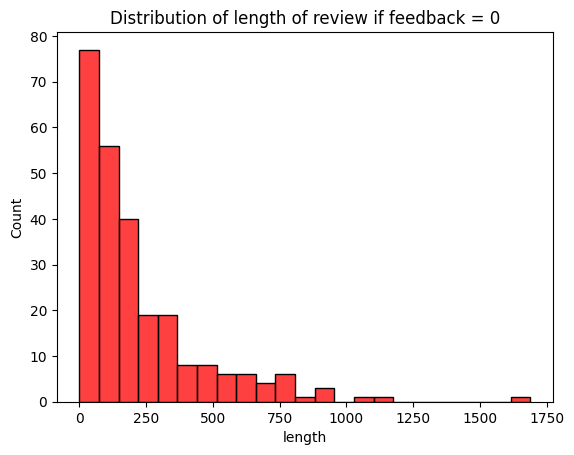

In [132]:
sns.histplot(data[data['feedback']==0]['length'],color='red').set(title='Distribution of length of review if feedback = 0')

In [133]:
# Length analysis when feedback is 1 (positive)

[Text(0.5, 1.0, 'Distribution of length of review if feedback = 1')]

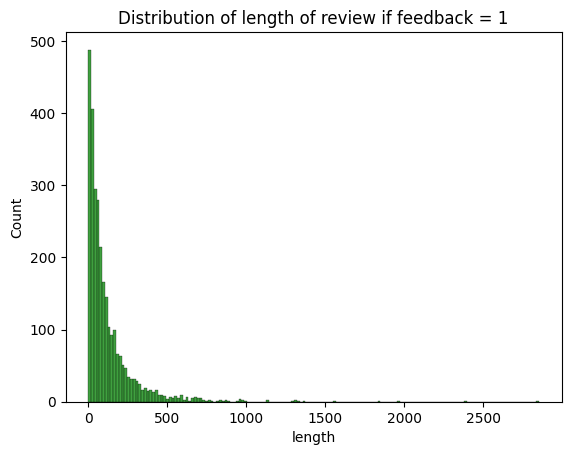

In [134]:
sns.histplot(data[data['feedback']==1]['length'],color='green').set(title='Distribution of length of review if feedback = 1')

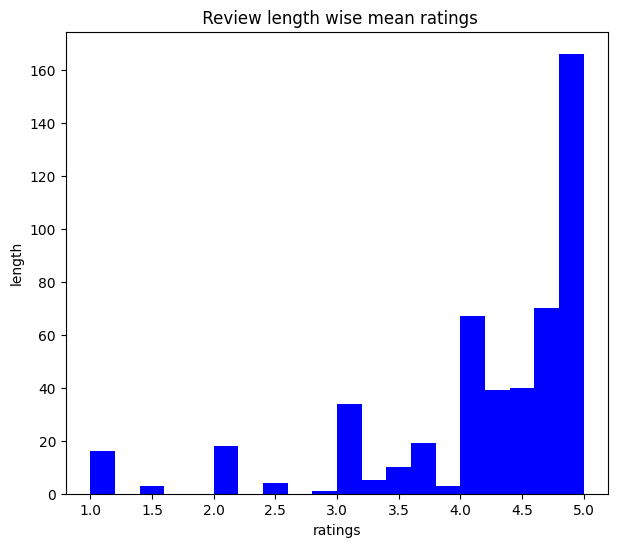

In [135]:
# Lengthwise mean rating
data.groupby ('length') ['rating'].mean().plot.hist(color = 'blue', figsize=(7,6), bins = 20)
plt.title(" Review length wise mean ratings")
plt.xlabel ('ratings')
plt.ylabel ('length')
plt.show()

In [136]:
cv = CountVectorizer(stop_words='english')
words = cv.fit_transform(data.verified_reviews)

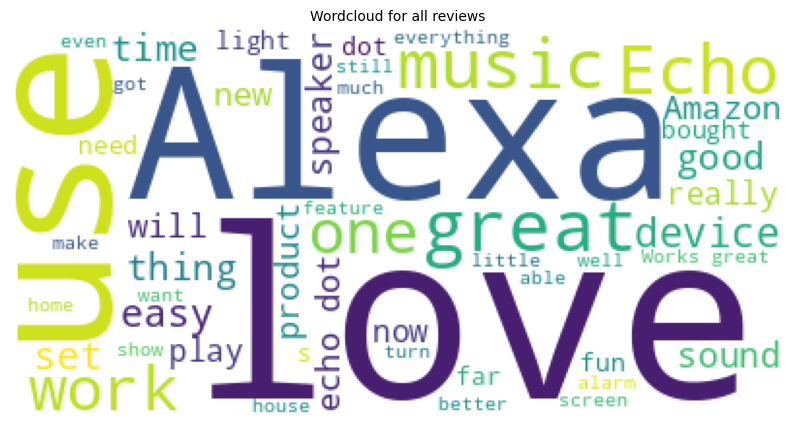

In [137]:
# Combine all reviews
reviews = " ".join([review for review in data[ 'verified_reviews']])
# Initialize wordcloud object
wc = WordCloud (background_color= 'white', max_words=50)
# Generate and plot wordcloud
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(reviews))
plt.title('Wordcloud for all reviews' , fontsize=10)
plt.axis('off')
plt.show()

In [138]:
# Lets find the unique words in each feedback category
# Combine all reviews for each feedback category and splitting them into individual words
neg_reviews = " ".join([review for review in data[data['feedback'] == 0][ 'verified_reviews' ]])
neg_reviews = neg_reviews. lower().split()
pos_reviews = " ".join([review for review in data[data[ 'feedback'] == 1][ 'verified_reviews']])
pos_reviews = pos_reviews. lower().split()
#Finding words from reviews which are present in that feedback category only
unique_negative = [x for x in neg_reviews if x not in pos_reviews]
unique_negative = " ". join(unique_negative)
unique_positive = [x for x in pos_reviews if x not in neg_reviews]
unique_positive = " ". join(unique_positive)

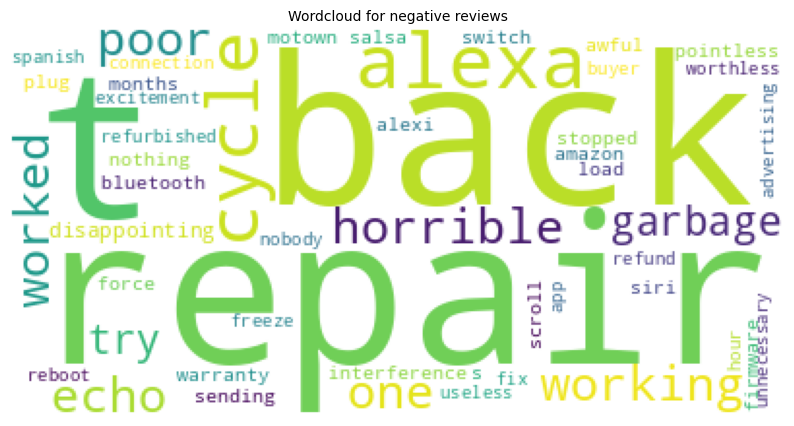

In [139]:
wc = WordCloud(background_color='white', max_words=50)
# Generate and plot wordcloud
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(unique_negative))
plt.title( 'Wordcloud for negative reviews', fontsize=10)
plt.axis('off')
plt.show()
#Negative words can be seen in the above word cloud - garbage, pointless, poor, horrible, repair etc.

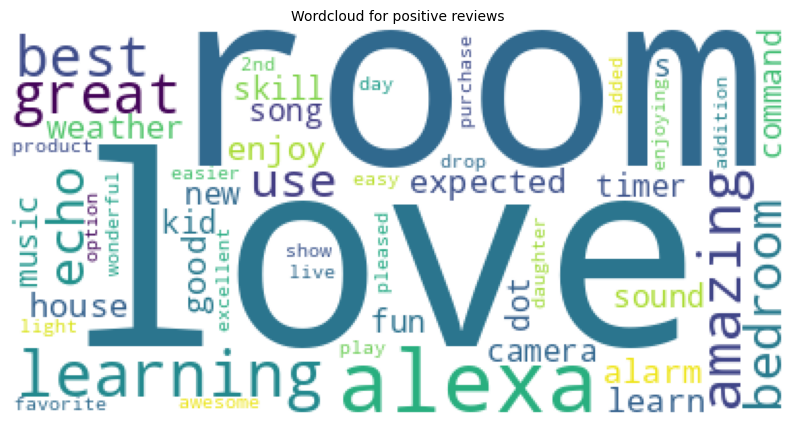

In [140]:
wc = WordCloud (background_color= 'white', max_words=50)
# Generate and plot wordcloud
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(unique_positive))
plt.title( 'Wordcloud for positive reviews', fontsize=10)
plt.axis('off')
plt.show()
# Positive words can be seen in the above word cloud - good, enjoying, amazing, best, great etc

Preprocessing and Modelling


To build the corpus from the 'verified_reviews' we perform the following -
1. Replace any non alphabet characters with a space
2. Covert to lower case and split into words
3. Iterate over the individual words and if it is not a stopword then add the stemmed form of the word to the corpus


In [141]:
corpus = []
stemmer = PorterStemmer ()
for i in range(0, data.shape[0]):
  review = re. sub('[^a-zA-Z]','', data. iloc[i]['verified_reviews'])
  review = review. lower().split()
  review = [stemmer.stem(word) for word in review if not word in STOPWORDS]
  review =''.join (review)
  corpus.append (review)

In [142]:
# Using Count Vectorizer to create bag of words
cv = CountVectorizer (max_features = 2500)
#Storing independent and dependent variables in X and y
X = cv.fit_transform(corpus).toarray()
y = data['feedback'].values

In [143]:
import os
os.makedirs('Models', exist_ok=True)
##Saving the Count vectorizer
pickle.dump(cv, open('Models/countVectorizer.pkl', 'wb'))

In [144]:
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (3149, 2233)
y shape: (3149,)


In [145]:
# Splitting data into train and test set with 30% data with testing
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.3, random_state = 15)
print(f"X train: {X_train.shape}")
print(f"y train: {Y_train.shape}")
print(f"X test: {X_test.shape}")
print(f"y test: {Y_test.shape}")

X train: (2204, 2233)
y train: (2204,)
X test: (945, 2233)
y test: (945,)


In [146]:
print(f"X train max value: {X_train.max()}")
print(f"X test max value: {X_test.max()}")

X train max value: 1
X test max value: 1


In [147]:
# We'll scale X_train and X_test so that all values are between 0 and
scaler = MinMaxScaler()
X_train_scl = scaler.fit_transform(X_train)
X_test_scl = scaler. transform(X_test)

In [148]:
#Saving the scaler model
pickle.dump (scaler, open( 'Models/scaler-pkl', 'wb'))

In [149]:
# random forest
#Fitting scaled X_train and y_train on Random Forest Classifier
model_rf = RandomForestClassifier ()
model_rf.fit(X_train_scl, Y_train)

RandomForestClassifier()

In [150]:
#Accuracy of the model on training and testing data
print("Training Accuracy :", model_rf.score(X_train_scl, Y_train))
print ("Testing Accuracy :", model_rf. score(X_test_scl, Y_test))

Training Accuracy : 0.9954627949183303
Testing Accuracy : 0.9375661375661376


In [151]:
#Predicting on the test set
y_preds = model_rf. predict(X_test_scl)

In [152]:
#Confusion Matrix
cm = confusion_matrix(Y_test, y_preds)

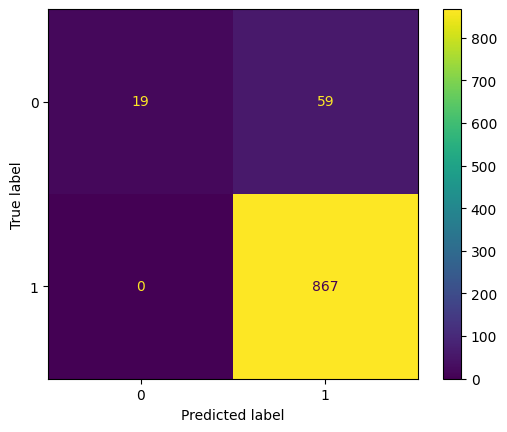

In [153]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_rf.classes_)
cm_display.plot()
plt. show()

In [154]:
# K fold cross-validation

In [155]:
# K fold cross-validation

accuracies = cross_val_score(estimator = model_rf, X = X_train_scl, y = Y_train, cv = 10)
print("Accuracy:", accuracies.mean())
print("Standard Variance :", accuracies.std())

Accuracy: 0.9283155080213904
Standard Variance : 0.006941824271914912


In [156]:
# Applying grid search to get the optimal parameters on random forest
params = {
'bootstrap': [True],
'max_depth': [80, 100],
'min_samples_split': [8, 12],
'n_estimators': [100, 300]
}

In [157]:
cv_object = StratifiedKFold(n_splits = 2)
grid_search = GridSearchCV(estimator = model_rf, param_grid = params, cv = cv_object, verbose = 0, return_train_score = True)
grid_search.fit(X_train_scl, Y_train.ravel())

GridSearchCV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'max_depth': [80, 100],
                         'min_samples_split': [8, 12],
                         'n_estimators': [100, 300]},
             return_train_score=True)

In [158]:
#Getting the best parameters from the grid search
print("Best Parameter Combination: {}".format(grid_search.best_params_))

Best Parameter Combination: {'bootstrap': True, 'max_depth': 100, 'min_samples_split': 8, 'n_estimators': 300}


In [159]:
print("Cross validation mean accuracy on train set : {}". format(grid_search.cv_results_['mean_train_score'].mean()*100))
print("Cross validation meanaccuracy on test set : {}".format(grid_search.cv_results_['mean_test_score'].mean()*100))
print("Accuracy score for test set:", accuracy_score(Y_test, y_preds))

Cross validation mean accuracy on train set : 95.85412885662433
Cross validation meanaccuracy on test set : 92.2073502722323
Accuracy score for test set: 0.9375661375661376


In [160]:
# XG Boost

In [161]:
model_xgb = XGBClassifier()
model_xgb.fit(X_train_scl, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [162]:
#Accurdey of the model on training and testing data
print("Training Accuracy :", model_xgb.score(X_train_scl, Y_train))
print("Testing Accuracy :", model_xgb.score(X_test_scl, Y_test))

Training Accuracy : 0.9192377495462795
Testing Accuracy : 0.9174603174603174


In [163]:
y_preds = model_xgb.predict(X_test)

In [164]:
#Confusibn Matrix
cm = confusion_matrix(Y_test, y_preds)
print(cm)

[[  0  78]
 [  0 867]]


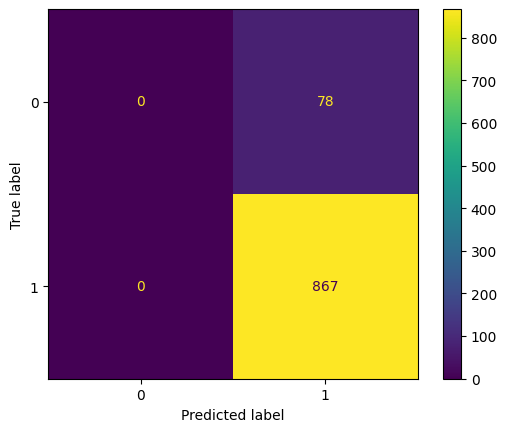

In [165]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_xgb.classes_)
cm_display.plot()
plt.show()

In [167]:
#Saving the XGBoost classifier
pickle.dump(model_xgb, open('Models/model_xgb.pkl', 'wb'))

In [ ]:
# Decision Tree

In [169]:
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train_scl, Y_train)

DecisionTreeClassifier()

In [172]:
#Accuracy of the model on training and testing data
print("Training Accuracy :", model_dt.score(X_train_scl, Y_train))
print("Testing Accuracy :", model_dt. score(X_test_scl, Y_test))

Training Accuracy : 0.9954627949183303
Testing Accuracy : 0.9375661375661376


In [174]:
y_preds = model_dt.predict(X_test)

In [175]:
#Confusion Matrix
cm = confusion_matrix(Y_test, y_preds)
print (cm)

[[ 19  59]
 [  0 867]]


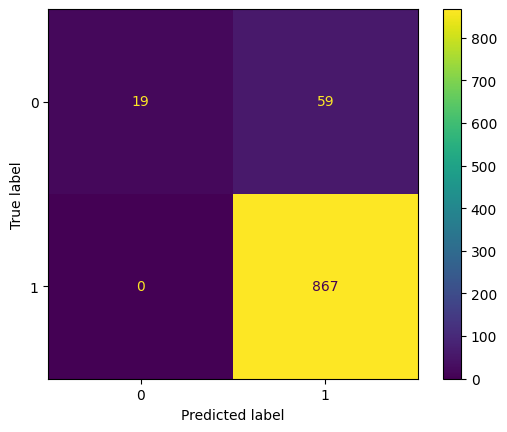

In [176]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_dt.classes_)
cm_display.plot()
plt.show()

In [178]:
#Saving the XGBoost classifier
pickle.dump(model_dt, open('Models/model_dt.pkl', 'wb'))